In [12]:
import pandas as pd
# Изначальный дата-файл "4. final_data.csv" переименован в "final_data.csv" и положен в корень воркспейса
# Загружаем данные, смотрим на внешний вид
df = pd.read_csv('final_data.csv')
df.head(4)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0


In [ ]:
# Посмортим на названия столбцов, типы данных и количество пропущенной информации:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   address        11330 non-null  object 
 2   info           11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  float64
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

Данные полные, пропусков нет.

Рассмотрим содержимое и количество уникальных значений некоторых ячеек

In [15]:
df['neighborhood'].value_counts()

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [16]:
df['usecode'].value_counts()

SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Cooperative            3
Apartment              3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

In [17]:
df['zipcode'].value_counts()

94110.0    935
94112.0    877
94107.0    857
94131.0    687
94116.0    655
94109.0    653
94114.0    651
94122.0    601
94115.0    534
94121.0    527
94117.0    473
94118.0    466
94134.0    439
94127.0    435
94123.0    430
94124.0    393
94103.0    360
94105.0    340
94102.0    318
94132.0    292
94133.0    183
94108.0    114
94158.0     71
94111.0     38
94104.0      1
Name: zipcode, dtype: int64

In [18]:
df['zpid'].value_counts()

82785427.0     5
59779814.0     4
79843553.0     4
15143549.0     4
15157051.0     3
              ..
15127583.0     1
15127518.0     1
15127493.0     1
15127478.0     1
122064190.0    1
Name: zpid, Length: 10686, dtype: int64

In [19]:
df.iloc[2,2]

' San FranciscoSales price: 1495000Sales date: 02/17/2016Bedrooms: 3Square feet: 1425Lot size: 2496'

Содержимое столбца ***'info'*** вцелом, дублирует содержимое других ячеек - город, 'lastsolddate', 'lastsoldprice', 'bedrooms', 'finishedsqft'.

In [ ]:
df.columns

Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

Первое, что бросается в глаза:
- столбец **'Unnamed: 0'** - очень похож на столбец-индекс, от него ***можно избавиться однозначно***, т.к. он дублирует индекс дата-фрейма
- **'address'** - текстовый адрес строения, для машинного анализа он не играет никакой роли, ***можно удалить***
- **'z_address'** - также текстовый адрес строения, для машинного анализа он не играет никакой роли, ***можно удалить***

Далее, есть возможность оценить полезность столбцов по их названию и содержанию полей

- **info**         - *object* - вцелом, дублирует содержимое других ячеек - город, 'lastsolddate', 'lastsoldprice', 'bedrooms', 'finishedsqft'. Но последняя цифра этого поля (пример: "Lot size: 2496"), в строке таблицы нигде не стречается, возможно имеет ценность для анализа. ***Оставляем*** для дальнейшей обработки.
- **bathrooms**    - *float64* - количество ванных комнат - высокое влияние на оценку стоимости - ***оставляем***
- **bedrooms**     - *float64* - количество спален - высокое влияние на оценку стоимости - ***оставляем***
- **finishedsqft** - *float64* - содержимое похоже на полщадь готового строения, если это так - высокое влияние на оценку стоимости - ***оставляем***
- **lastsolddate** - *object* - дата последней продажи данного объекта - полезность данных неизвестна - стоит ***оставить***
- **lastsoldprice** - *float64* - цена последней продажи, полезность неизвестна - стоит ***оставить***
- **latitude**     - *float64* - географическая широта, может быть полезна для кластеризации по цене, в зависимости от района - ***оставляем***
- **longitude**    - *float64* - географическая долгота, может быть полезна для кластеризации по цене, в зависимости от района - ***оставляем***
- **neighborhood** - *object* - очень похоже на близость объекта к местным достопримечательностям, может оказывать реальное влияние на оценочную стоимость - ***оставляем***
- **totalrooms**   - *float64* - общее количество комнат (или помещений) объекта, однозначно оказывает влияние на стоимость - ***оставляем***
- **usecode**      - *object* - тип объекта оценки (апартаменты, кондоминимум, таунхаус и т.д) - ***оставляем***
- **yearbuilt**    - *float64* - год постройки, вполне можето казывать влияние на оценку - ***оставляем***
- **zestimate**    - *float64* - предварительная оценка объекта, судя по названию и содержимому столбца - ***оставляем***
- **zindexvalue**  - *object* - что-то связаное с ценой (возможно цена, запрошенная продавсцом на данный момент) - ***оставляем***
- **zipcode**      - *float64* - почтовый индекс, указывает на район нахождения объекта, однозначно оказывает влияние на оценку, к тому же, в таком виде легко кластеризовать объекты - ***оставляем***
- **zpid**         - *float64* - абсолютно непонятно назначение столбца, ценность данных неизвестна - ***оставим*** для дальнейшего анализа

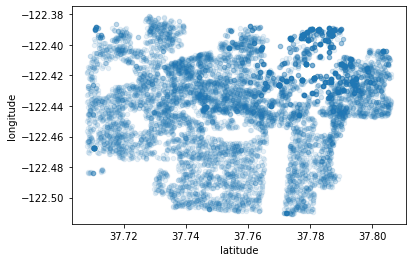

In [22]:
df.plot(x='latitude', y='longitude', kind='scatter', alpha=0.1)

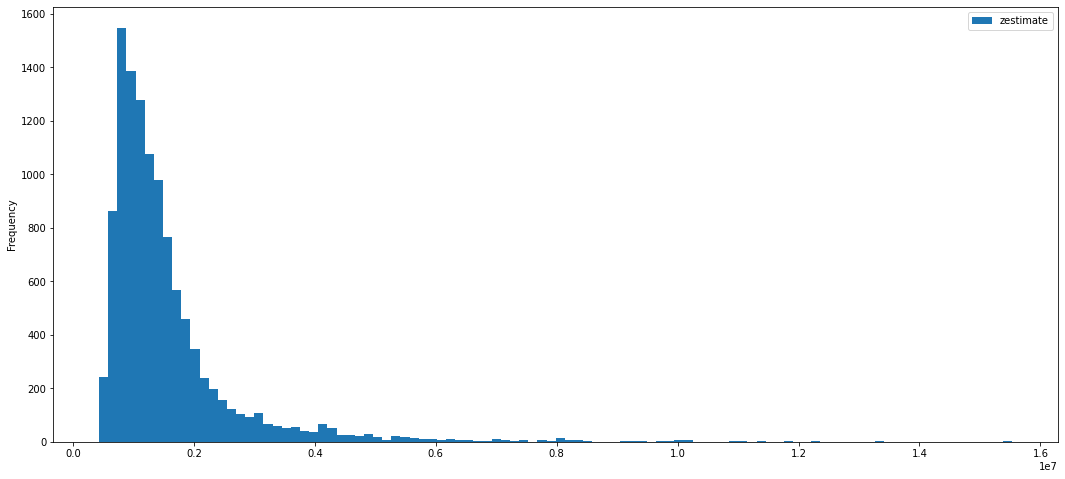

In [34]:
df.plot(x='zipcode', y='zestimate', kind='hist', bins=100, figsize=(18,8))

In [30]:
df.drop(columns=['Unnamed: 0', 'address', 'info', 'z_address'], inplace=True)

In [31]:
df.corr()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.603158,0.090754,-0.047326
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.477676,0.197236,-0.101559
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.758493,0.126858,-0.079424
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.876939,0.018839,-0.038444
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.309783,-0.314698,0.115466
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.072770,-0.274959,0.129480
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.111990,0.034886,-0.010918
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.212563,-0.159110,0.187554
zestimate,0.603158,0.477676,0.758493,0.876939,0.309783,-0.072770,0.111990,-0.212563,1.000000,0.034531,-0.034331
zipcode,0.090754,0.197236,0.126858,0.018839,-0.314698,-0.274959,0.034886,-0.159110,0.034531,1.000000,-0.111868


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4e036f1d0>,
      dtype=object)

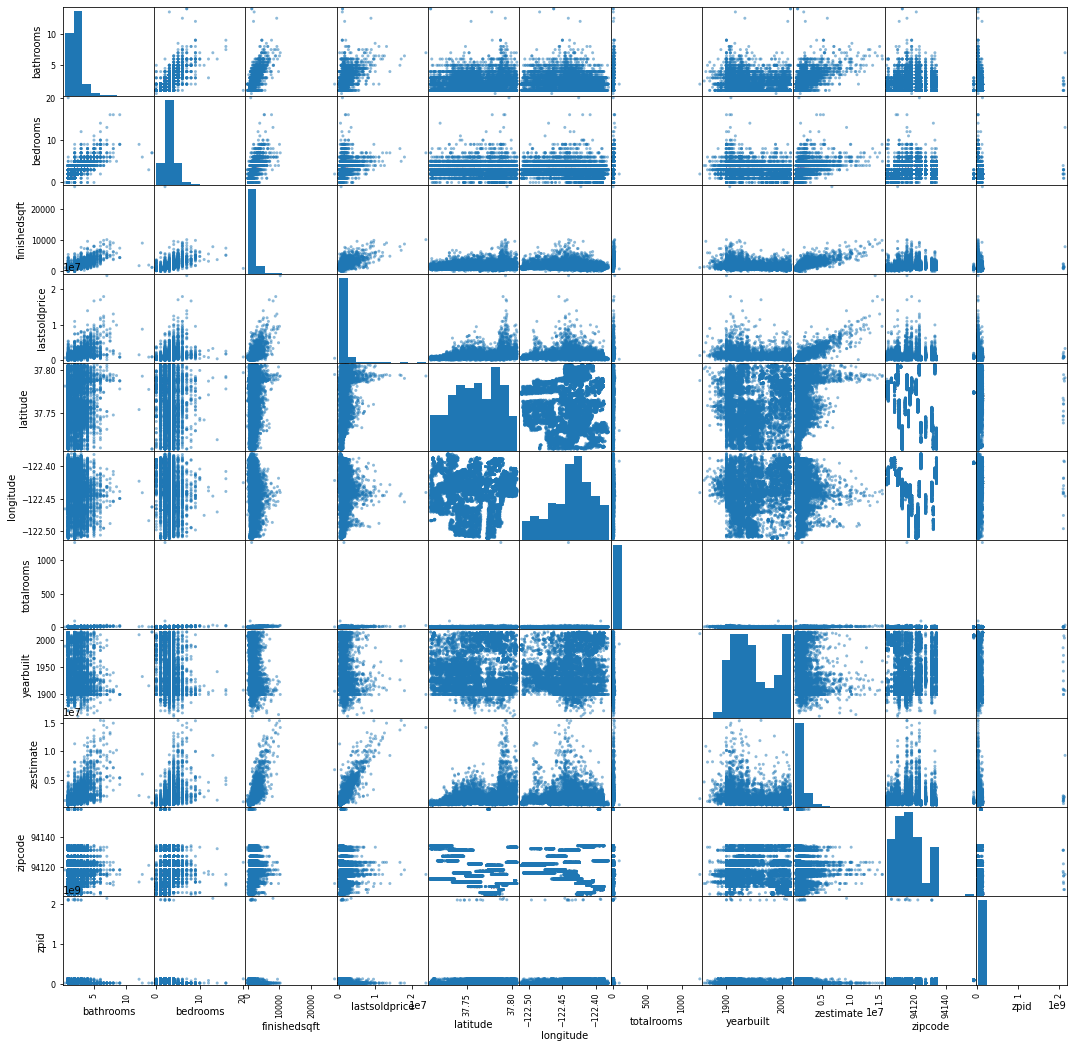

In [35]:
pd.plotting.scatter_matrix(df, figsize=(18, 18))